### 커스텀 데이터 셋(Custom Dataset)

class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  데이터셋의 전처리를 해주는 부분

  def __len__(self):
  #데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
  len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len
  
  def __getitem__(self, idx): 
  #데이터셋에서 특정 1개의 샘플을 가져오는 함수
  dataset[i]을 했을 때, i번째 샘플을 가져오도록 하는 인덱싱!을 하는 get_item

In [13]:
import torch
import torch.nn.functional as F

In [14]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [15]:
#Dataset 상속하는 클래스 생성
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    #총 데이터의 개수를 리턴
    def __len__(self):
        return len(self.x_data)
    
    #인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [16]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [17]:
model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [20]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        #print(batch_idx)
        #print(samoles)
        x_train, y_train = samples
        #H(x) 계산
        prediction = model(x_train)
        
        #cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        #cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 28689.867188
Epoch    0/20 Batch 2/3 Cost: 11423.349609
Epoch    0/20 Batch 3/3 Cost: 5223.971191
Epoch    1/20 Batch 1/3 Cost: 594.927917
Epoch    1/20 Batch 2/3 Cost: 292.621033
Epoch    1/20 Batch 3/3 Cost: 112.570816
Epoch    2/20 Batch 1/3 Cost: 15.895484
Epoch    2/20 Batch 2/3 Cost: 2.053813
Epoch    2/20 Batch 3/3 Cost: 12.148526
Epoch    3/20 Batch 1/3 Cost: 2.589458
Epoch    3/20 Batch 2/3 Cost: 0.724630
Epoch    3/20 Batch 3/3 Cost: 1.573888
Epoch    4/20 Batch 1/3 Cost: 3.525662
Epoch    4/20 Batch 2/3 Cost: 1.457690
Epoch    4/20 Batch 3/3 Cost: 0.050306
Epoch    5/20 Batch 1/3 Cost: 0.034462
Epoch    5/20 Batch 2/3 Cost: 2.813385
Epoch    5/20 Batch 3/3 Cost: 2.001472
Epoch    6/20 Batch 1/3 Cost: 0.591199
Epoch    6/20 Batch 2/3 Cost: 0.392175
Epoch    6/20 Batch 3/3 Cost: 5.994114
Epoch    7/20 Batch 1/3 Cost: 2.688673
Epoch    7/20 Batch 2/3 Cost: 2.397870
Epoch    7/20 Batch 3/3 Cost: 0.198181
Epoch    8/20 Batch 1/3 Cost: 0.055598
Epoch 

In [22]:
#임의의 입력 [73, 80, 75]를 선언
new_var = torch.FloatTensor([73, 80, 75])
#입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([150.3578], grad_fn=<AddBackward0>)


## 로지스틱 회귀(Logistic Regression)
- 둘 중 하나를 결정하는 문제를 이진 분류라고 한다.
- 대표적인 알고리즘으로 로지스틱 회귀가 있다.(이름은 회귀지만 분류 작업에 주로 사용)

### 이진 분류
- 아래와 같은 이진 분류 된 그래프가 있을시 직선으로는 분류가 잘 작동하지는 않는다.

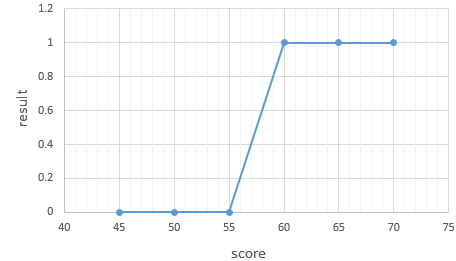

### 시그모이드 함수(Sigmoid function)
- H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)
- 이러한 시그모이드 함수를 이용하여 S자 형태로 그래프를 그릴수 있다.
- 회귀와 마찬가지로 최적의 W와 b를 구하는 식으로 진행된다.



In [26]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

In [27]:
#넘파이를 이용한 시그모이드 함수 정의
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

#### w가 1이고 b가 0인 그래프

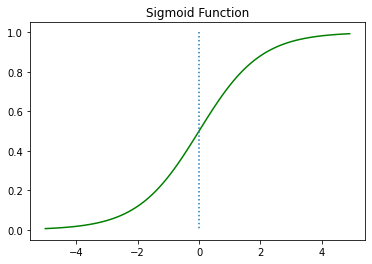

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') #가운데 접선 추가
plt.title('Sigmoid Function')
plt.show()

#아래 그래프를 통해 시그모이드 함수는 출력값을 0 ~ 1  사이로 반환함을 알 수 있다.

### W값의 변화에 따른 경사도의 변화

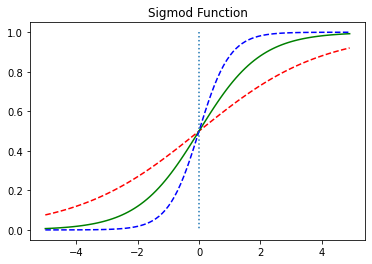

In [41]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일 때
plt.plot(x, y2, 'g') # W의 값이 1일 때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일 때
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 접선 추가
plt.title("Sigmod Function")
plt.show()

#그전까지 W는 직선의 기울기를 의미 했지만 그림을 보니 시그모이드 함수에서는 그래프의 경사도를 결정한다.
#따라서 W이 커지면 경사가 커지고, W의 값이 작아지면 경사가 작아진다.

### b값의 변화에 따른 좌,우 이동

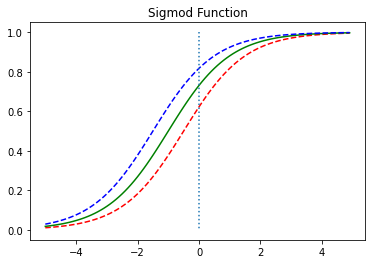

In [40]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x +1.5)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일 때
plt.plot(x, y2, 'g') # W의 값이 1일 때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일 때
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 접선 추가
plt.title("Sigmod Function")
plt.show()

### 시그모이드 함수를 이용한 분류
- 이처럼 시그모이드 함수가 0에서 1사이의 값을 가지는 특성을 이용해 특정 값 이상 이하로 분류를 판단할 수 있다.

### 비용 함수(Cost Function)
- 로지스틱 회귀의 가설 : H(x) = sigmoid(Wx + b)
- 선형회귀에서 사용한 MSE를 사용하면 
- cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2
- 위와 같고 이를 미분한 그림은 아래와 같은 심한 비볼록 형태의 그래프가 나온다.

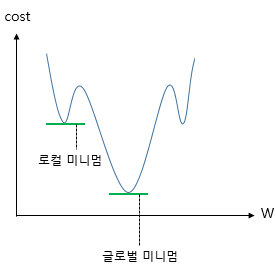

- 경사 하강법으로 오차의 최소값에 도달해도 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달할수 있다.
- 이는 cost가 최소가 되는 가중치 W를 찾는다는 목적에 맞지 않는다.
- 그렇다면 이를 가장 잘 반영하는 함수는 무엇일까?
- 바로 y = 0.5에 대칭하는 두개의 로그 함수 그래프이다.

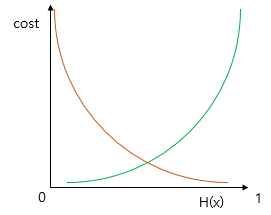

- 이를 수식적으로 표현해서 정리하면 아래와 같다.
- \text{cost}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]
- MSE와 마찬가지로 모든 오차의 평균을 구한다.
- cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]
- 위 비용 함수를 미분하여 경사하강법을 수행하면 아래와 같다.

- W := W - α\frac{∂}{∂W}cost(W)

## 파이토치로 로지스틱 회귀 구현하기

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [43]:
torch.manual_seed(1)

In [44]:
# 데이터
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [45]:
# 행렬연산으로 가설을 수립한다.
print(x_train.shape)
print(y_train.shape)

#XW가 성립하기 위해서는 W벡터의 크기는 2* 1이여야만 한다.

torch.Size([6, 2])
torch.Size([6, 1])


In [46]:
W = torch.zeros((2,1), requires_grad =True) #크기 2 * 1
b = torch.zeros(1, requires_grad=True)

In [52]:
#지수함수는 torch.exp(x)로 구현
hypothesis = 1/ (1 + torch.exp(-(x_train.matmul(W) + b)))
#torch에서 제공하는 sigmoid함수 이용
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [53]:
print(hypothesis) # 6 * 1의 크기를 가지는 예측벡터가 생성됨을 알 수 있다.

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


- 아래와 같은 시그모이드 비용 함수를 이용해
- 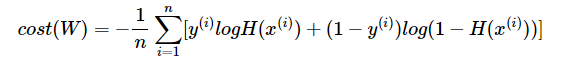

In [54]:
#현재의 예측값, 실제값
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [57]:
#모든 원소 오차 계산
losses = -(y_train * torch.log(hypothesis) + (1 - y_train)* torch.log(1- hypothesis))
print(losses)
cost = losses.mean()
print(cost)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [59]:
#사실 이런 계산 방법은 이미 파이토치에서 지원하는 중인데 binary_cross_entropy기능을 사용하면 된다.
F.binary_cross_entropy(hypothesis, y_train)
#동일한 0.6931이 출력됨을 알 수 있다.

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [61]:
#전체 코드
#데이터
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [62]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [64]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [65]:
#0.5를 넘으면 True, 넘지 않으면 False로 출력한다.
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [67]:
#수정된 가중치
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## nn.Module로 구현하는 로지스틱 회귀

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [69]:
torch.manual_seed(1)

In [70]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [71]:
# nn.Sequential()은 nn.Module층을 차례로 쌓을 수 있도록 한다.
model = nn.Sequential(
    nn.Linear(2, 1), #input_dim = 2, output_dim = 1
    nn.Sigmoid() #출력은 시그모이드 함수를 거친다.
)

In [73]:
model(x_train) #현재 W와 b는 랜덤 초기화가 된 상태.

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [74]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614851 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [75]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [77]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


## 인공 신경망으로 표현되는 로지스틱 회귀.
사실 로지스틱 회귀는 인공신경망과 구조가 동일하다.

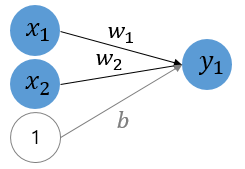

H(x)=sigmoid(x_{1}w_{1} + x_{2}w_{2} + b)
- 뒤에서 인공 신경망을 배우면서 언급하겠지만, 시그모이드 함수는 인공 신경망의 은닉층에서는 거의 사용되지 않습니다.

## 모델을 클래스로 구현하기

In [83]:
class BinaryClassifier(nn.Module):
    def __init__(self): #모델의 구조와 동적을 정의하는 생성자 정의
        super().__init__() # super 함수의 특징nn.Module 클래스의 속성들을 가지고 초기화!
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        return self.sigmoid(self.linear(x))

클래스(class) 형태의 모델은 nn.Module 을 상속받습니다. 그리고 __init__()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 됩니다. foward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수입니다. 이 forward() 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이됩니다. 예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행됩니다.

## 로지스틱 회귀 클래스로 구현하기

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#seed 설정
torch.manual_seed(1)

In [88]:
#데이터
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [91]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [92]:
model = BinaryClassifier() #super로 인해 모든 속성들이 초기화 되어 있음

In [93]:
#optimizer 설정
optimizer = optim.SGD(model.parameters(), lr =1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    #H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614851 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

## 원-핫 인코딩(One-Hot Encoding) 
- 범주형 데이터를 처리할 때 레이블을 표현하는 방법
- 선택해야 하는 선택지의 개수만큼의 차원을 가지고, 각 선택지의 인덱스에 해당하는 원소에 1, 나머지는 0의 값을 가지도록 하는 표현 방법
- 원-핫 벡터: 원-핫 인코딩으로 표현된 벡터!

### 원-핫 벡터의 무작위성
- 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 적절한 표현 방법이다.
- 정수 인코딩 처럼 {Banana :1, Tomato :2, Apple :3, Strawberry :4, ... Watermelon :10} 이런 식으로 인코딩할경우 클래스 간의 관계가 균등하게 분배가 되지 않아 오차를 계산시에 잘못된 정보를 컴퓨터에게 주게 됩니다. 따라서 이러한 한계를 원-핫 벡터의 무작위성을 바탕으로 해결이 가능한 것이다. 하지만 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

## 소프트맥스 회귀(Softmax Regression) 이해하기
- 3개 이상의 선택지 중에서 1개를 고르는 다중클래스 분류이다.

## 다중 클래스 분류(Multi-class Classification)

### 소프트맥스 함수
- 분류해야하는 정답지(클래스)의 총 개수를 K라고 할 때, K차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다.